In [5]:
import numpy as np
from matplotlib import pyplot as plt

# Brownian Motion

$$\begin{align}
B_0 &= 0 \\
B_{n\Delta t} &= B_{(t-1)\Delta t} + \sqrt{\Delta t} z_n
\end{align}$$

where $z_n \sim \mathcal{N}(0,1)$.

In [25]:
# Alternatively we can drop the T variable and merely stipulate an increment + number of points to compute
T = 1
time_points = 10000
increment = T/time_points
trajectory = [0]
for i in range(time_points):
    realization = trajectory[-1]+np.sqrt(increment)*np.random.normal()
    trajectory.append(realization)

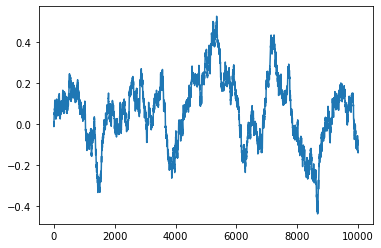

In [26]:
# to-do: x-axis should be scaled to end with value T
plt.plot(trajectory)

# Poisson process

The random numbers with exponential distribution can be computed using `numpy.random.exponential`:
https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html

The exponential function above uses a different parameter $\beta = 1/\lambda$.

In [27]:
intensity = 2
beta = 1/intensity
P_trajectory = [0]